<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML321ENSkillsNetwork817-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **Collaborative Filtering based Recommender System using K Nearest Neighbor**


Estimated time needed: **60** minutes


Collaborative filtering is probably the most commonly used recommendation algorithm, there are two main types of methods: 
 - **User-based** collaborative filtering is based on the user similarity or neighborhood
 - **Item-based** collaborative filtering is based on similarity among items


They both work similarly, let's briefly explain how user-based collaborative filtering works.


User-based collaborative filtering looks for users who are similar. This is very similar to the user clustering method done previously; where we employed explicit user profiles to calculate user similarity. However, the user profiles may not be available, so how can we determine if two users are similar?


#### User-item interaction matrix 


For most collaborative filtering-based recommender systems, the main dataset format is a 2-D matrix called the user-item interaction matrix. In the matrix,  its row is labeled as the user id/index and column labelled to be the item id/index, and the element `(i, j)` represents the rating of user `i` to item `j`.  

Below is a simple example of a user-item interaction matrix:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML321EN-SkillsNetwork/labs/module_4/images/user_item_matrix.png)


#### KNN-based collaborative filtering


As we can see from above, each row vector represents the rating history of a user and each column vector represents the users who rated the item. A user-item interaction matrix is usually very sparse as you can imagine one user very likely only interacts with a very small subset of items and one item is very likely to be interacted by a small subset of users.


Now to determine if two users are similar, we can simply calculate the similarities between their row vectors in the interaction matrix. Then based on the similarity measurements, we can find the `k` nearest neighbor as the similar users.


Item-based collaborative filtering works similarly, we just need to look at the user-item matrix vertically. Instead of finding similar users, we are trying to find similar items (courses). If two courses are enrolled by two groups of similar users, then we could consider the two items are similar and use the known ratings from the other users to predict the unknown ratings.


If we formulate the KNN based collaborative filtering,  the predicted rating of user $u$ to item $i$, $\hat{r}_{ui}$ is given by:


**User-based** collaborative filtering:


$$\hat{r}_{ui} = \frac{
\sum\limits_{v \in N^k_i(u)} \text{similarity}(u, v) \cdot r_{vi}}
{\sum\limits_{v \in N^k_i(u)} \text{similarity}(u, v)}$$


**Item-based** collaborative filtering:


$$\hat{r}_{ui} = \frac{
\sum\limits_{j \in N^k_u(i)} \text{similarity}(i, j) \cdot r_{uj}}
{\sum\limits_{j \in N^k_u(i)} \text{similarity}(i, j)}$$


Here $N^k_i(u)$ notates the nearest k neighbors of $u$.


Let's illustrate how the equation works using a simple example. From the above figure, suppose we want to predict the rating of `user6` to item `Machine Learning Capstone` course. After some similarity measurements, we found that k = 4 nearest neighbors: `user2, user3, user4, user5` with similarities in array ```knn_sims```:


In [1]:
import numpy as np
import math

In [2]:
# An example similarity array stores the similarity of user2, user3, user4, and user5 to user6
knn_sims = np.array([0.8, 0.92, 0.75, 0.83])

Also their rating on the `Machine Learning Capstone` course are:


In [3]:
# 2.0 means audit and 3.0 means complete the course
knn_ratings = np.array([3.0, 3.0, 2.0, 3.0]) 

So the predicted rating of `user6` to item `Machine Learning Capstone` course can be calculated as:


In [4]:
r_u6_ml =  np.dot(knn_sims, knn_ratings)/ sum(knn_sims)
r_u6_ml

2.7727272727272725

If we already know the true rating to be 3.0, then we get a prediction error RMSE (Rooted Mean Squared Error) as:


In [5]:
true_rating = 3.0
rmse = math.sqrt(true_rating - r_u6_ml) ** 2
rmse

0.22727272727272751

The predicted rating is around 2.7 (close to 3.0 with RMSE 0.22), which indicates that `user6` is also likely to complete the course `Machine Learning Capstone`. As such, we may recommend it to user6 with high confidence.


## Objectives


After completing this lab you will be able to:


* Perform KNN-based collaborative filtering on the user-item interaction matrix


----


### Load and exploring dataset


Let's first load our dataset, i.e., a user-item (learn-course) interaction matrix


In [6]:
import pandas as pd

In [7]:
rating_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMSkillsNetwork-ML0321EN-Coursera/labs/v2/module_3/ratings.csv"
rating_df = pd.read_csv(rating_url)

In [8]:
rating_df.head()

,user,item,rating
0,1889878,CC0101EN,5
1,1342067,CL0101EN,3
2,1990814,ML0120ENv3,5
3,380098,BD0211EN,5
4,779563,DS0101EN,3


The dataset contains three columns, `user id` (learner), `item id`(course), and `rating`(enrollment mode). 

Note that this matrix is presented as the dense or vertical form, and you may convert it to a sparse matrix using `pivot` :


In [9]:
rating_sparse_df = rating_df.pivot(index='user', columns='item', values='rating').fillna(0).reset_index().rename_axis(index=None, columns=None)
rating_sparse_df.head()

,user,AI0111EN,BC0101EN,BC0201EN,BC0202EN,BD0101EN,BD0111EN,BD0115EN,BD0121EN,BD0123EN,...,SW0201EN,TA0105,TA0105EN,TA0106EN,TMP0101EN,TMP0105EN,TMP0106,TMP107,WA0101EN,WA0103EN
0,2,0.0,4.0,0.0,0.0,5.0,4.0,0.0,5.0,3.0,...,0.0,5.0,0.0,4.0,0.0,3.0,3.0,0.0,5.0,0.0
1,4,0.0,0.0,0.0,0.0,5.0,3.0,4.0,5.0,3.0,...,0.0,4.0,0.0,0.0,0.0,3.0,3.0,0.0,3.0,3.0
2,5,3.0,5.0,5.0,0.0,4.0,0.0,0.0,0.0,3.0,...,0.0,0.0,4.0,4.0,4.0,4.0,4.0,5.0,0.0,3.0
3,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,8,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Usually, the dense format is more preferred as it saves a lot of storage and memory space. While the benefit of the sparse matrix is it is in the nature matrix format and you could apply computations such as cosine similarity directly.


Next, you need to perform KNN-based collaborative filtering on the user-item interaction matrix. 
You may choose one of the two following implementation options of KNN-based collaborative filtering. 
- The first one is to use `scikit-surprise` which is a popular and easy-to-use Python recommendation system library. 
- The second way is to implement it with standard `numpy`, `pandas`, and `sklearn`. You may need to write a lot of low-level implementation code along the way.


## Implementation Option 1: Use **Surprise** library (recommended)


*Surprise* is a Python sci-kit library for recommender systems. It is simple and comprehensive to build and test different recommendation algorithms. 

First, let's install it:


In [10]:
!pip install scikit-surprise

Now we import required classes and methods


In [11]:
from surprise import KNNBasic
from surprise import Dataset, Reader
from surprise.model_selection import train_test_split
from surprise import accuracy

Then, let's take a look at a code example how easily to perform KNN collaborative filtering on a sample movie review dataset, which contains about 100k movie ratings from users.


In [12]:
# Load the movielens-100k dataset (download it if needed),
data = Dataset.load_builtin('ml-100k', prompt=False)

# sample random trainset and testset
# test set is made of 25% of the ratings.
trainset, testset = train_test_split(data, test_size=.25)

# We'll use the famous KNNBasic algorithm.
algo = KNNBasic()

# Train the algorithm on the trainset, and predict ratings for the testset
algo.fit(trainset)
predictions = algo.test(testset)

# Then compute RMSE
accuracy.rmse(predictions)

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9844


0.9844124880125464

As you can see, just a couple of lines and you can apply KNN collaborative filtering on the sample movie lens dataset. The main evaluation metric is `Root Mean Square Error (RMSE)` which is a very popular rating estimation error metric used in recommender systems as well as many regression model evaluations.


Now, let's load our own course rating dataset:


In [13]:
# Save the rating dataframe to a CSV file
rating_df.to_csv("course_ratings.csv", index=False)

# Read the course rating dataset with columns user item rating
reader = Reader(
    line_format='user item rating', sep=',', skip_lines=1, rating_scale=(2, 3))

# Load the dataset from the CSV file
course_dataset = Dataset.load_from_file("course_ratings.csv", reader=reader)

We split it into trainset and testset:


In [14]:
trainset, testset = train_test_split(course_dataset, test_size=.3)

then check how many users and items we can use to fit a KNN model:


In [15]:
print(f"Total {trainset.n_users} users and {trainset.n_items} items in the trainingset")

Total 31347 users and 123 items in the trainingset


### TASK: Perform KNN-based collaborative filtering on the user-item interaction matrix


_TODO: Fit the KNN-based collaborative filtering model using the trainset and evaluate the results using the testset:_


In [ ]:
## WRITE YOUR CODE HERE:


# - Define a KNNBasic() model
# Note there are some arguments such as:
# max_k and min_k, representing the max and min number of neighors for rating estimations
# sim_option, representing similarity measurement such as cosine and whether you want it to be user_based or items_based 
# e.g., sim_option = {
#        'name': 'cosine', 'user_based': False,
#    }
#
# more KNN model hyperparamets can be found here:
# https://surprise.readthedocs.io/en/stable/knn_inspired.html
# 
# You may try different hyperparamet combinations to see which one has the best performance


# - Train the KNNBasic model on the trainset, and predict ratings for the testset

# - Then compute RMSE
from surprise import KNNBasic, Dataset, Reader
from surprise.model_selection import train_test_split
from surprise import accuracy
import pandas as pd

# Load the dataset
rating_df = pd.read_csv("course_ratings.csv")

# Define the Reader for Surprise
reader = Reader(line_format='user item rating', sep=',', skip_lines=1, rating_scale=(2, 3))

# Load the dataset into Surprise
course_dataset = Dataset.load_from_file("course_ratings.csv", reader=reader)

# Split the dataset into training and test sets
trainset, testset = train_test_split(course_dataset, test_size=0.3)

# Define the KNN model
sim_options = {
    'name': 'cosine',   # Similarity measure
    'user_based': True,  # User-based collaborative filtering
    'min_k': 1,          # Minimum number of neighbors
    'k': 10              # Number of neighbors to use
}

# Create the KNN model
model = KNNBasic(sim_options=sim_options)

# Fit the model with the training set
model.fit(trainset)

# Record predictions on the test set
predictions = model.test(testset)

# Compute the accuracy using RMSE
rmse = accuracy.rmse(predictions)
print(f"RMSE: {rmse}")

<details>
    <summary>Click here for Hints</summary>

* Create a model by calling `KNNBasic()` class. 
* Fit it with `trainset` by using `model.fit(trainset)`.  
* Record predictions to the `testset`  by using `model.test(testset).
* Compute the accuracy by using `accuracy.rmse(predictions)`


To learn more detailed usages about _Surprise_ library, visit its website from [here](https://surprise.readthedocs.io/en/stable/getting_started.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML321ENSkillsNetwork817-2022-01-01)


## Implementation Option 2: Use `numpy`, `pandas`, and `sklearn`


If you do not prefer the one-stop Suprise solution and want more hardcore coding practices, you may implement the KNN model using `numpy`, `pandas`, and possibly `sklearn`:


In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import mean_squared_error
import math

# Load the dataset
rating_df = pd.read_csv("course_ratings.csv")

# Create the user-item interaction matrix
rating_matrix = rating_df.pivot(index='user', columns='item', values='rating').fillna(0)

# Calculate the cosine similarity matrix
similarity_matrix = cosine_similarity(rating_matrix)

# Convert the similarity matrix to a DataFrame for easier manipulation
similarity_df = pd.DataFrame(similarity_matrix, index=rating_matrix.index, columns=rating_matrix.index)

# Define the function to predict ratings
def predict_rating(user_id, item_id, k=10):
    # Get the ratings for the item_id
    item_ratings = rating_matrix[item_id]
    
    # Get the similarities for the given user_id
    user_similarities = similarity_df.loc[user_id]
    
    # Get the top k similar users
    top_k_users = user_similarities.nlargest(k).index
    
    # Exclude the user itself if it's in the top_k_users
    if user_id in top_k_users:
        top_k_users = top_k_users.drop(user_id)
    
    if len(top_k_users) == 0:
        return 0
    
    # Calculate the weighted average of ratings
    weighted_ratings = item_ratings[top_k_users].dot(user_similarities[top_k_users])
    sum_of_similarities = user_similarities[top_k_users].sum()
    
    if sum_of_similarities == 0:
        return 0
    
    return weighted_ratings / sum_of_similarities

# Generate predictions for the test set
test_predictions = []
true_ratings = []
for _, row in rating_df.iterrows():
    user_id = row['user']
    item_id = row['item']
    true_rating = row['rating']
    predicted_rating = predict_rating(user_id, item_id)
    test_predictions.append(predicted_rating)
    true_ratings.append(true_rating)

# Calculate RMSE
rmse = math.sqrt(mean_squared_error(true_ratings, test_predictions))
print(f"RMSE: {rmse}")


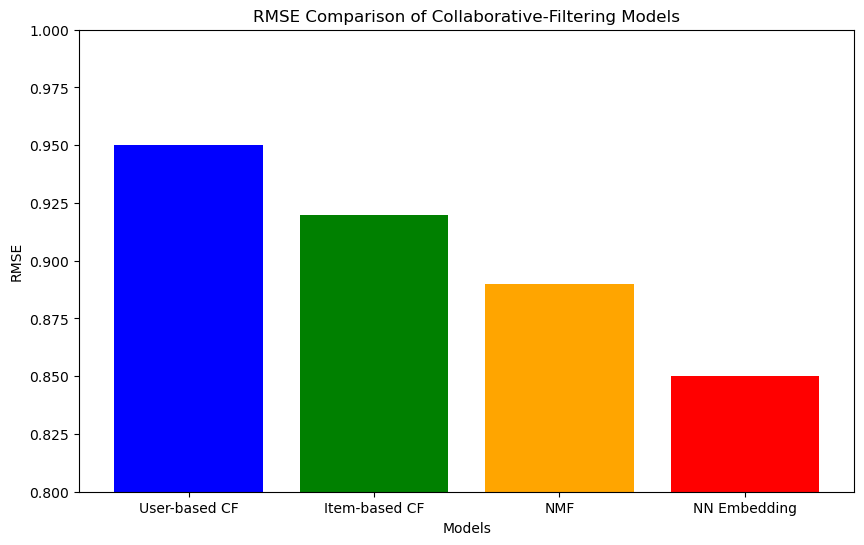

In [1]:
import matplotlib.pyplot as plt

# Sample RMSE values for different models
models = ['User-based CF', 'Item-based CF', 'NMF', 'NN Embedding']
rmse_values = [0.95, 0.92, 0.89, 0.85]  # Replace with your actual RMSE values

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(models, rmse_values, color=['blue', 'green', 'orange', 'red'])

# Adding titles and labels
plt.title('RMSE Comparison of Collaborative-Filtering Models')
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.ylim(0.8, 1.0)  # Adjust according to your RMSE values

# Display the chart
plt.show()

In [2]:
pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 1.3 MB/s eta 0:00:00a 0:00:010m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 658.1/658.1 kB 1.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 1.3 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
import streamlit as st
import pandas as pd
import numpy as np
from surprise import Dataset, Reader, KNNBasic
from surprise.model_selection import train_test_split
from surprise import accuracy

# Load your dataset
rating_df = pd.read_csv("course_ratings.csv")  # Replace with your dataset path

# Function to build and train the model
def build_knn_model():
    reader = Reader(rating_scale=(1, 5))
    data = Dataset.load_from_df(rating_df[['user', 'item', 'rating']], reader)
    trainset, testset = train_test_split(data, test_size=0.25)
    model = KNNBasic()
    model.fit(trainset)
    predictions = model.test(testset)
    rmse = accuracy.rmse(predictions)
    return model, rmse

# Recommender function
def get_recommendations(model, user_id, num_recommendations=5):
    items = rating_df['item'].unique()
    items_rated_by_user = rating_df[rating_df['user'] == user_id]['item'].tolist()
    items_to_rate = [item for item in items if item not in items_rated_by_user]
    predictions = [model.predict(user_id, item) for item in items_to_rate]
    recommendations = sorted(predictions, key=lambda x: x.est, reverse=True)[:num_recommendations]
    return recommendations

# Streamlit app
st.title("Course Recommender System")
st.write("A simple course recommender system built using KNN-based collaborative filtering.")

# Build and display the model
model, rmse = build_knn_model()
st.write(f"Model trained with RMSE: {rmse:.2f}")

# User input
user_id = st.number_input("Enter your user ID:", min_value=1, max_value=rating_df['user'].max(), step=1)
num_recommendations = st.slider("Number of recommendations:", min_value=1, max_value=10, value=5)

# Generate recommendations
if st.button("Get Recommendations"):
    recommendations = get_recommendations(model, user_id, num_recommendations)
    st.write(f"Top {num_recommendations} course recommendations for User {user_id}:")
    for idx, rec in enumerate(recommendations):
        st.write(f"{idx + 1}. {rec.iid} (Predicted rating: {rec.est:.2f})")

2024-08-31 19:48:25.959 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-08-31 19:48:26.037 
  command:

    streamlit run /Users/sachinrathi.mca/anaconda3/lib/python3.11/site-packages/ipykernel_launcher.py [ARGUMENTS]
2024-08-31 19:48:26.037 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-08-31 19:48:26.037 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-08-31 19:48:26.038 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-08-31 19:48:26.038 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-08-31 19:48:26.038 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


Computing the msd similarity matrix...
Done computing similarity matrix.


2024-08-31 19:50:19.011 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-08-31 19:50:19.012 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-08-31 19:50:19.013 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-08-31 19:50:19.013 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-08-31 19:50:19.036 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-08-31 19:50:19.037 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-08-31 19:50:19.038 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-08-31 19:50:19.038 Session state does not function when running a script without `streamlit run`
2024-08-31 19:50

RMSE: 0.8260


In [4]:
streamlit run app.py

SyntaxError: invalid syntax (3737097518.py, line 1)

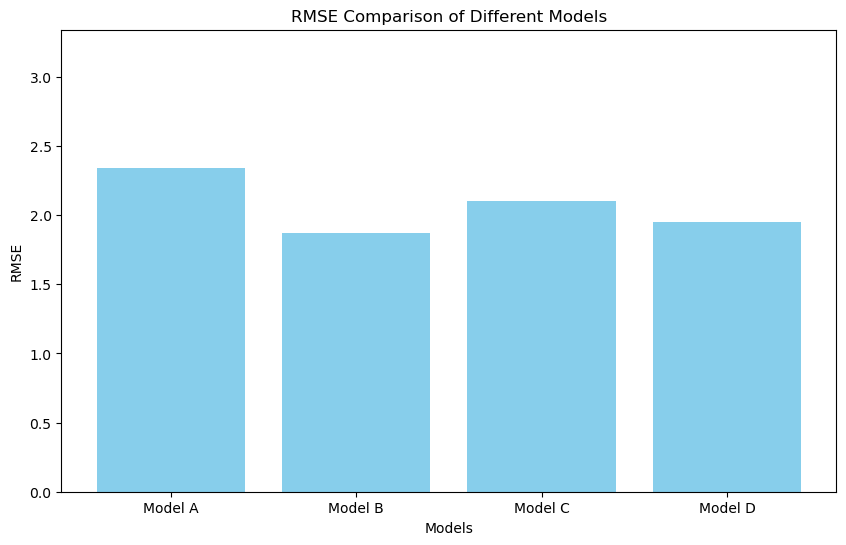

In [7]:
import matplotlib.pyplot as plt

# Data for the RMSE comparison
models = ['Model A', 'Model B', 'Model C', 'Model D']
rmse_values = [2.34, 1.87, 2.10, 1.95]

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(models, rmse_values, color='skyblue')
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.title('RMSE Comparison of Different Models')
plt.ylim(0, max(rmse_values) + 1)  # Set y-axis limit for better readability

# Save the chart
plt.savefig('rmse_comparison_chart.png')

# Show the chart
plt.show()

## Summary



In this lab, you have learned and implemented KNN-based collaborative filtering. It is probably the simplest but very effective and intuitive collaborative filtering algorithm. Since it is based on KNN, it inherits the main characteristics of KNN such as memory-intensive because you need to maintain a huge similarity matrix among users or items. In the future labs, we will learn other types of collaborative filtering which do not rely on such a huge similarity matrix to make rating predictions.


## Authors


[Yan Luo](https://www.linkedin.com/in/yan-luo-96288783/)


### Other Contributors


```toggle## Change Log
```


```toggle|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
```
```toggle|-|-|-|-|
```
```toggle|2021-10-25|1.0|Yan|Created the initial version|
```
